In [1]:
import numpy
import os
import tensorflow as tf
from att_avg import train
from collections import defaultdict

/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/ten

In [2]:
tf.reset_default_graph()

if __name__ == '__main__':
    ############ use TITLE
    model_name = 'models/'   #os.path.basename(os.path.dirname(os.path.realpath(__file__)))
    train(
    saveto           = './{}.npz'.format(model_name),
    reload_          = False, #原来是true
    dim_word         = 100, # or 300 glove  
    dim              = 50,  #options['dim']*2 = nin
    patience         = 30,
    n_words          = 22671,  #22671
    clip_c           = 10.,
    lrate            = 0.04,
    alpha_balance    = 0.04,
    optimizer        = 'adam',
    maxlen           = None,
    batch_size       = 32,
    valid_batch_size = 32,
    dispFreq         = 20,
    validFreq        = int(1411/32+1),#1421  #1391
    saveFreq         = int(1411/32+1),
    use_dropout      = True,
    verbose          = False,
    types            = 'title',
    cut_word         = False,
    cut_news         = False,
    keep_prob        = 0.5,
    datasets         = ['news_set/train.csv',
                       'price_set/train_label.csv'],
    valid_datasets   = ['news_set/validate.csv',
                        'price_set/validate_label.csv'],
    test_datasets    = ['news_set/test.csv',
                        'price_set/test_label.csv'],
    #tech_data        = 'technical.csv',
    dictionary       = 'news_set/vocab_cased_title.pickle',  #news_set/vocab_cased_title.pickle
    embedding        = "glove/glove.6B.100d.txt",
    wait_N           = 1
    )
        





Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use keras.layers.dense instead.





embedding:0 (22671, 100)
sentence_enc/sequence_encode/bidirectional_rnn/fw/lstm_cell/kernel:0 (150, 200)
sentence_enc/sequence_encode/bidirectional_rnn/fw/lstm_cell/bias:0 (200,)
sentence_enc/sequence_encode/bidirectional_rnn/bw/lstm_cell/kernel:0 (150, 200)
sentence_enc/sequence_encode/bidirectional_rnn/bw/lstm_cell/bias:0 (200,)
sentence_enc/word_attention/hidden/kernel:0 (100, 50)
sentence_enc/word_attention/out/kernel:0 (50, 10)
sentence_enc/word_attention/over_attention_hidden/kernel:0 (100

In [3]:
import matplotlib.pyplot as plt
import pickle

In [4]:
def main():

    with open("results/MIL/important_plot.pickle",
              'rb') as handle:
        diction = pickle.load(handle)
    for key, value in diction.items():
        print(key)
        #print(len(value[0]))
    ##TODO show the training accuracy
    plt.plot(diction['training'])
    plt.title('training loss')
    plt.ylabel('loss')
    plt.xlabel('per batch')
    plt.legend(['training'], loc='upper left')
    #plt.legend(['50D', '100D', '200D', '300D'], loc='upper left')
    plt.show()
    
    plt.plot(diction['training_ep'])
    plt.title('training loss')
    plt.ylabel('loss')
    plt.xlabel('per epoch')
    plt.legend(['training'], loc='upper left')
    #plt.legend(['50D', '100D', '200D', '300D'], loc='upper left')
    plt.show()
    
    plt.plot(diction['train_ep'])
    plt.title('training accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('per epoch')
    plt.legend(['training'], loc='upper left')
    #plt.legend(['50D', '100D', '200D', '300D'], loc='upper left')
    plt.show()

    ##TODO show the testing accuracy
    plt.plot(diction['validate'])
    plt.plot(diction['testing'])
    plt.title('validate and testing loss')
    plt.ylabel('loss')
    plt.xlabel('per batch')
    plt.legend(['validate', 'testing'], loc='upper left')
    plt.show()

    plt.plot(diction['validate_ep'])
    plt.plot(diction['testing_ep'])
    plt.title('validate and testing loss')
    plt.ylabel('loss')
    plt.xlabel('per epoch')
    plt.legend(['validate', 'testing'], loc='upper left')
    plt.show()
    
    plt.plot(diction['val_ep'])
    plt.plot(diction['test_ep'])
    plt.title('validate and testing accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('per epoch')
    plt.legend(['validate', 'testing'], loc='upper left')
    plt.show()
    

training
validate
testing
validate_ep
val_ep
testing_ep
test_ep
training_ep
train_ep


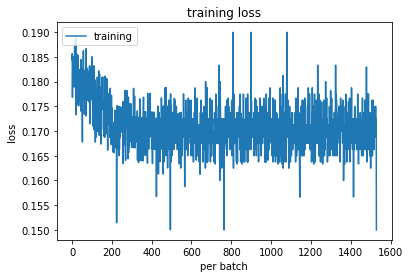

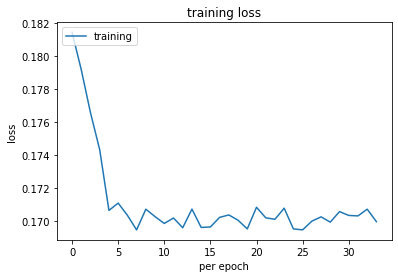

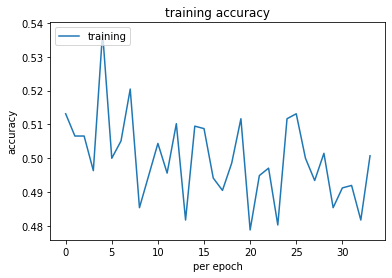

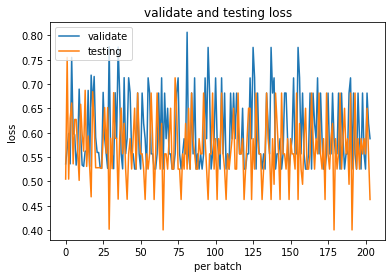

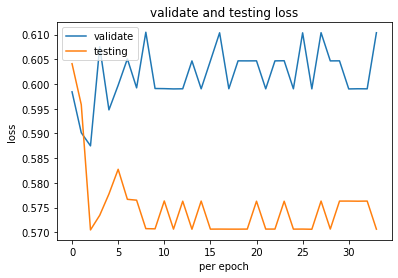

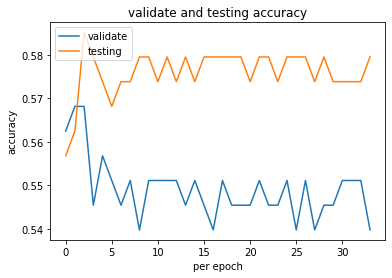

In [5]:
if __name__ == '__main__':
    main()